# PHYS 304 Computing Project - Relaxation Method
### Name: Jacob Buchanan

Consider a closed metal box having a rectangular cross section $a \times b \times c$. The lid (in figure) is located in the $xy$-plane at $z=c$ and is maintained at a potential $V_0$ relative to the other five sides of the box which are connected to the ground. Imagine the lid is electrically isolated from the rest of the box.

The full potential is given by,

$$V(x,y,z)=\frac{16V_0}{\pi^2}\sum_{m,n=odd}^{\infty}\frac{1}{mn}\sin{\frac{m\pi x}{a}}\sin{\frac{n\pi y}{b}}\frac{\sinh{\gamma_{mn}z}}{\sinh{\gamma_{mn}c}}$$

where $m$ and $n$ are odd integers and $\gamma_{mn}=\pi \sqrt{\frac{m^2}{a^2}+\frac{n^2}{b^2}}$.

Approximate solutions for $V(x,y,z)$ may be obtained by truncating the infinite series at specified upper limits for both of the summations in the expression for V above.

Let $a=b=c=10cm$ and $V_0=1000V$. Let the tolerance between iterations be $1\times 10^{-6}$.

Now calculate the potential at discrete points inside the box on a lattice having unit cell size $\Delta x=\Delta y=\Delta z=1cm$. For this purpose, take $1\leq x \leq 9cm$, $1\leq y \leq 9cm$, and $0\leq z \leq 9cm$. Produce a grid displaying the potentials (to one decimal place) at twenty evenly space points in the $yz$-plane for $x=5cm$.

## Solution

In [1]:
# Import the necessities
import numpy as np
import matplotlib.pyplot as plt

#### The Relaxation Method

The relaxation method is a numerical method of solution on a grid or lattice. Start with boundary points and set these to their correct values. Then assign starting values arbitrarily to the interior grid points. Next, for each grid point in turn, reset its value to the average of its nearest neighbors. Iterate over the whole set of interior gird points until the changes between iterations are between your set tolerance. 

In [2]:
# First define the parameters of the system

a = 10
b = 10
c = 10

v0 = 1000

tolerance = 1e-6

In [3]:
# Next, define some functions used for the full potential

# This is the gamma seen in the full potential
def gamma(m, n):
    return np.pi * np.sqrt((m**2/a**2)+(n**2/b**2))

# This computes one term of the full potential
def v_term(x, y, z, m, n):
    return (1/(m*n))*np.sin((m*np.pi*x)/a)*np.sin((n*np.pi*y)/b)*np.sinh(gamma(m, n)*z)/np.sinh(gamma(m, n)*c)

# This calculates the full potential up to m, n = max_term
def v_full(x, y, z, max_term):
    v = 0
    for m in range(1, max_term+2, 2):
        for n in range(1, max_term+2, 2):
            v += v_term(x, y, z, m, n)
    return v*16*v0/np.pi**2

In [13]:
# Create the grid

yi = [1,3,5,7,9]
zi = [2,4,6,8]

points = []
for y in yi:
    for z in zi:
        points.append([y,z])

[1, 2]
[1, 4]
[1, 6]
[1, 8]
[3, 2]
[3, 4]
[3, 6]
[3, 8]
[5, 2]
[5, 4]
[5, 6]
[5, 8]
[7, 2]
[7, 4]
[7, 6]
[7, 8]
[9, 2]
[9, 4]
[9, 6]
[9, 8]


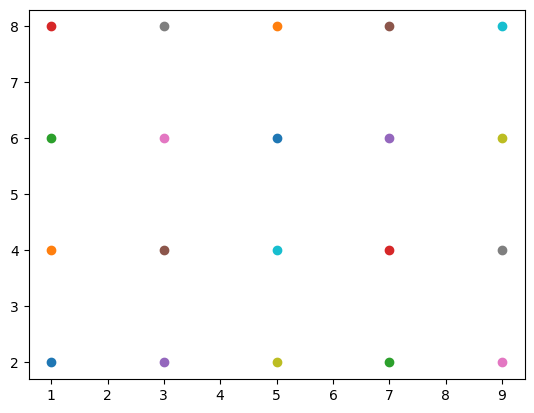

In [15]:
# Plot the grid to test it

fig = plt.figure()
for point in points:
    print(point)
    plt.plot(point[0],point[1], 'o')
plt.show()